# Logistic Regression

In [1]:
import pandas as pd

### Data Loading

In [3]:
dfList = []
for i in range(1,32):
    print(".",end='', flush=True)
    dfList.append(pd.read_json("./data/fraud-data/2017-01-{0:02d}.txt".format(i), lines=True))
print("done!")
df = pd.concat(dfList)

...............................done!


In [4]:
print(df.fraudLabel.value_counts())
df.head()

0    30036
1      964
Name: fraudLabel, dtype: int64


,basket,fraudLabel,totalAmount,transactionId,zipCode
0,"[3, 1, 4, 0, 0, 5]",0,384,6880641119,9634
1,"[2, 1, 3, 0, 3, 1, 5, 0]",0,344,4281904331,3203
2,"[3, 4, 0, 2, 3, 0, 0]",0,266,2580426654,4436
3,"[1, 1, 0, 3]",0,172,4759637311,3185
4,[5],0,36,7491226830,5052


### Feature Engineering

In [5]:
df['c_0'] = df.basket.map(lambda x: x.count(0))
df['c_1'] = df.basket.map(lambda x: x.count(1))
df['c_2'] = df.basket.map(lambda x: x.count(2))
df['c_3'] = df.basket.map(lambda x: x.count(3))
df['c_4'] = df.basket.map(lambda x: x.count(4))
df['c_5'] = df.basket.map(lambda x: x.count(5))

In [6]:
df.head()

,basket,fraudLabel,totalAmount,transactionId,zipCode,c_0,c_1,c_2,c_3,c_4,c_5
0,"[3, 1, 4, 0, 0, 5]",0,384,6880641119,9634,2,1,0,1,1,1
1,"[2, 1, 3, 0, 3, 1, 5, 0]",0,344,4281904331,3203,2,2,1,2,0,1
2,"[3, 4, 0, 2, 3, 0, 0]",0,266,2580426654,4436,3,0,1,2,1,0
3,"[1, 1, 0, 3]",0,172,4759637311,3185,1,2,0,1,0,0
4,[5],0,36,7491226830,5052,0,0,0,0,0,1


In [7]:
df["zipCode"] = df["zipCode"].astype('category',categories=list(range(1000,10000)))
dummies = pd.get_dummies(df.zipCode)

/Users/garethjones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [8]:
dummies.shape

(31000, 9000)

In [9]:
df2 = pd.concat([df, dummies], axis=1)

In [10]:
df3 = df2.drop(["basket", "zipCode", "transactionId"], axis=1)

In [11]:
df3.head()

,fraudLabel,totalAmount,c_0,c_1,c_2,c_3,c_4,c_5,1000,1001,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,384,2,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,344,2,2,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,266,3,0,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,172,1,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,36,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model training

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df3, test_size=0.3, random_state=0)
# save data to csv
train.to_pickle("./data/train.pickle")
test.to_pickle("./data/test.pickle")
train.head()

,fraudLabel,totalAmount,c_0,c_1,c_2,c_3,c_4,c_5,1000,1001,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
281,0,46,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,0,1060,1,0,4,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
273,0,120,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
725,0,87,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,0,121,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train = train[train.columns[1:]]
y_train = train["fraudLabel"]
X_test = test[test.columns[1:]]
y_test = test["fraudLabel"]
X_train.shape

(21700, 9007)

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)

/Users/garethjones/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### Model evaluation

In [16]:
test_scores_reg = logreg.predict_proba(X_test)
test_scores_gbt = gbt.predict_proba(X_test)

In [17]:
from sklearn import metrics
fpr_reg, tpr_reg, _ =  metrics.roc_curve(y_test, test_scores_reg[:,1])
auc_reg = metrics.auc(fpr_reg, tpr_reg)
fpr_gbt, tpr_gbt, _ =  metrics.roc_curve(y_test, test_scores_gbt[:,1])
auc_gbt = metrics.auc(fpr_gbt, tpr_gbt)

In [18]:
# save predictions to csv
df = pd.DataFrame(data={'label': y_test, 'predReg': test_scores_reg[:,1], 
                  'predGbt': test_scores_gbt[:,1] })
df.to_csv("./data/predictions.csv", index=False)

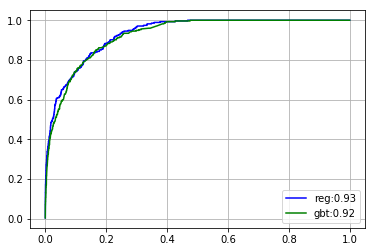

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg:{:.2f}".format(auc_reg))
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt:{:.2f}".format(auc_gbt))
plt.legend()
plt.grid()
plt.show()

### Save predictions on train data for modelCalibration

In [20]:
train_scores_reg = logreg.predict_proba(X_train)
train_scores_gbt = gbt.predict_proba(X_train)

In [21]:
# save predictions to csv
df = pd.DataFrame(data={'label': y_train, 'predReg': train_scores_reg[:,1], 
                  'predGbt': train_scores_gbt[:,1] })
df.to_csv("./data/predictions_train.csv", index=False)

### Pickle the model for use on a server

In [23]:
import pickle
pickle.dump(logreg,open('models/logreg_model.pickle','wb'))
pickle.dump(gbt,open('models/gbt_model.pickle','wb'))

In [63]:
basket = [0,1,2,3,4,5]
zipCode = 5376
totalAmount = 163

datalist = pd.DataFrame({'basket':[basket]})
dataint = pd.DataFrame({'zipCode':zipCode,'totalAmount':totalAmount},index=[0],dtype=int)
data = pd.concat([datalist,dataint],axis=1)

data['c_0'] = data.basket.map(lambda x: x.count(0))
data['c_1'] = data.basket.map(lambda x: x.count(1))
data['c_2'] = data.basket.map(lambda x: x.count(2))
data['c_3'] = data.basket.map(lambda x: x.count(3))
data['c_4'] = data.basket.map(lambda x: x.count(4))
data['c_5'] = data.basket.map(lambda x: x.count(5))

data["zipCode"] = data["zipCode"].astype('category',categories=list(range(1000,10000)))
dummies = pd.get_dummies(data.zipCode)

data2 = pd.concat([data, dummies], axis=1)

data3 = data2.drop(["basket", "zipCode"], axis=1)
data3.head()

/Users/garethjones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  app.launch_new_instance()


,totalAmount,c_0,c_1,c_2,c_3,c_4,c_5,1000,1001,1002,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,163,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
data3.shape

(1, 9007)

In [81]:
def probability(basket, zipCode, totalAmount):
    
    import pandas as pd
    import pickle
    
    print("Processing request: {},{},{}".format(basket, zipCode, totalAmount))
    
    datalist = pd.DataFrame({'basket':[basket]})
    dataint = pd.DataFrame({'zipCode':zipCode,'totalAmount':totalAmount},index=[0],dtype=int)
    data = pd.concat([datalist,dataint],axis=1)
    
    data['c_0'] = data.basket.map(lambda x: x.count(0))
    data['c_1'] = data.basket.map(lambda x: x.count(1))
    data['c_2'] = data.basket.map(lambda x: x.count(2))
    data['c_3'] = data.basket.map(lambda x: x.count(3))
    data['c_4'] = data.basket.map(lambda x: x.count(4))
    data['c_5'] = data.basket.map(lambda x: x.count(5))
    
    data["zipCode"] = data["zipCode"].astype('category',categories=list(range(1000,10000)))
    dummies = pd.get_dummies(data.zipCode)
    
    data2 = pd.concat([data, dummies], axis=1)
    data3 = data2.drop(["basket", "zipCode"], axis=1)   
    
    filepath = '/Users/garethjones/Documents/Data Science/Data Science Retreat/15. Practical Data Science - Patrick/models/'
    gbt = pickle.load(open(filepath+'gbt_model.pickle','rb'))
    prediction = gbt.predict_proba(data3)
    prediction_fraud = round(prediction[0][1],3)
    
    return prediction_fraud

In [82]:
probability(basket,zipCode,totalAmount)

Processing request: [0, 1, 2, 3, 4, 5],5376,163


/Users/garethjones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


0.004

# Performance Evaluation

### Load prediction data

In [1]:
import pandas as pd
predictions = pd.read_csv("./data/predictions.csv")
predictions.head()

FileNotFoundError: File b'./data/predictions.csv' does not exist

### Roc construction

In [2]:
def rocPoints(classifier):
    positives = predictions[predictions.label == 1].shape[0]
    negatives = predictions[predictions.label == 0].shape[0]
    fprPoints = [0]
    tprPoints = [0]
    sortedPred = predictions[classifier].sort_values(ascending = False)
    for p in sortedPred:
        aboveThreshold = predictions[predictions[classifier] >= p].label # get part of df above p
        tpr = aboveThreshold[aboveThreshold == 1].shape[0] / float(positives)
        fpr = aboveThreshold[aboveThreshold == 0].shape[0] / float(negatives)
        fprPoints.append(fpr)
        tprPoints.append(tpr)
    return fprPoints, tprPoints

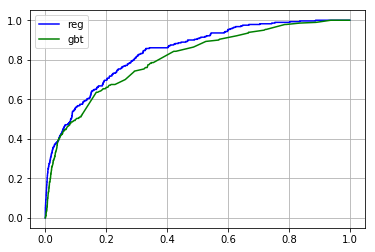

In [3]:
fpr_reg, tpr_reg =  rocPoints("predReg")
fpr_gbt, tpr_gbt =  rocPoints("predGbt")

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg")
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt")
plt.legend()
plt.grid()
plt.show()

### Roc from library

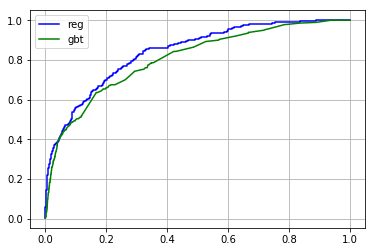

In [4]:
from sklearn.metrics import roc_curve
fpr_reg, tpr_reg, _ =  roc_curve(predictions["label"], predictions["predReg"])
fpr_gbt, tpr_gbt, _ =  roc_curve(predictions["label"], predictions["predGbt"])

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg")
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt")
plt.legend()
plt.grid()
plt.show()

# Dealing with Imbalanced Data

In [1]:
import pandas as pd
train = pd.read_pickle("./data/train.pickle")
test = pd.read_pickle("./data/test.pickle")

In [2]:
from sklearn.utils import resample

train_majority = train[train.fraudLabel==0]
train_minority = train[train.fraudLabel==1]

# Upsample minority class
train_minority_upsampled = resample(train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=train_majority.shape[0],  # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_majority, train_minority_upsampled])

# Show new class counts
train_upsampled.fraudLabel.value_counts()

1    21086
0    21086
Name: fraudLabel, dtype: int64

In [3]:
X_train = train_upsampled[train_upsampled.columns[1:]]
y_train = train_upsampled["fraudLabel"]
X_test = test[test.columns[1:]]
y_test = test["fraudLabel"]

In [4]:
from sklearn.linear_model import LogisticRegression
logreg_up = LogisticRegression()
logreg_up.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
gbt_up = GradientBoostingClassifier()
gbt_up.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [6]:
from sklearn import metrics
test_scores = logreg_up.predict_proba(X_test)
fpr_reg_up, tpr_reg_up, _ = metrics.roc_curve(y_test, test_scores[:,1])
auc_reg_up = metrics.auc(fpr_reg_up, tpr_reg_up)

In [7]:
test_scores = gbt_up.predict_proba(X_test)
fpr_gbt_up, tpr_gbt_up, _ = metrics.roc_curve(y_test, test_scores[:,1])
auc_gbt_up = metrics.auc(fpr_gbt_up, tpr_gbt_up)

In [8]:
predictions = pd.read_csv("./data/predictions.csv")
fpr_reg, tpr_reg, _ = metrics.roc_curve(predictions["label"], predictions["predReg"])
auc_reg = metrics.auc(fpr_reg, tpr_reg)
fpr_gbt, tpr_gbt, _ = metrics.roc_curve(predictions["label"], predictions["predGbt"])
auc_gbt = metrics.auc(fpr_gbt, tpr_gbt)

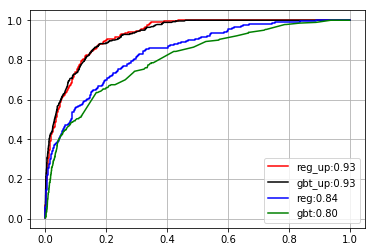

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg_up, tpr_reg_up, color = 'red', label = "reg_up:{:.2f}".format(auc_reg_up))
plt.plot(fpr_gbt_up, tpr_gbt_up, color = 'black', label = "gbt_up:{:.2f}".format(auc_gbt_up))
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg:{:.2f}".format(auc_reg))
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt:{:.2f}".format(auc_gbt))
plt.legend()
plt.grid()
plt.show()

In [10]:
# save predictions of upsampled reg model
predictions['predReg_up'] = test_scores[:,1]
predictions.to_csv("./data/predictions_up.csv", index=False)

### Save predictions on train data for probCalib

In [11]:
# save predictions to csv
df = pd.read_csv("./data/predictions_train.csv")
df["predReg_up"] = logreg_up.predict_proba(train[train.columns[1:]])[:,1]
df.to_csv("./data/predictions_train_up.csv", index=False)

# Calibration Error

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/predictions.csv')
df.drop('predGbt', axis=1, inplace=True)

In [3]:
df.sort_values('predReg', inplace=True, ascending=False)

In [4]:
df.head()

,label,predReg
7491,1,0.988733
2867,1,0.979334
5389,1,0.977029
396,1,0.969618
3946,0,0.967657


In [5]:
df['bucket'] = [ i // 5 for i in range(9300)]

In [6]:
df.head(13)

,label,predReg,bucket
7491,1,0.988733,0
2867,1,0.979334,0
5389,1,0.977029,0
396,1,0.969618,0
3946,0,0.967657,0
8490,1,0.966440,1
7183,0,0.964273,1
6148,1,0.946296,1
2489,1,0.944071,1
327,1,0.937800,1


In [7]:
df_bucketed = df.groupby(['bucket']).mean()

In [8]:
df_bucketed.head(5)

,label,predReg
bucket,,
0,0.8,0.976474
1,0.8,0.951776
2,1.0,0.916446
3,0.8,0.868946
4,0.8,0.818592


In [9]:
df_bucketed['error'] = (df_bucketed['label'] - df_bucketed['predReg'])

In [10]:
df_bucketed.head(5)

,label,predReg,error
bucket,,,
0,0.8,0.976474,-0.176474
1,0.8,0.951776,-0.151776
2,1.0,0.916446,0.083554
3,0.8,0.868946,-0.068946
4,0.8,0.818592,-0.018592


In [11]:
rmse = np.sqrt(np.mean(df_bucketed['error']**2))

In [12]:
rmse

0.06549244100909929

# Imputing Data

### Train and save prediction model

In [17]:
import pandas as pd
dfList = []
for i in range(1,32):
    print(".",end='', flush=True)
    dfList.append(pd.read_json("./data/fraud-data/2017-01-{0:02d}.txt".format(i), lines=True))
print("done!")
df = pd.concat(dfList)

...............................done!


In [18]:
df['c_0'] = df.basket.map(lambda x: x.count(0))
df['c_1'] = df.basket.map(lambda x: x.count(1))
df['c_2'] = df.basket.map(lambda x: x.count(2))
df['c_3'] = df.basket.map(lambda x: x.count(3))
df['c_4'] = df.basket.map(lambda x: x.count(4))

In [19]:
# make sure all possible values are defined
df["zipCode"] = df["zipCode"].astype('category',categories=[i for i in list(range(1000,10000))])

/Users/pbaier/anaconda3/envs/analyse/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [20]:
dummies = pd.get_dummies(df.zipCode)
df2 = pd.concat([df, dummies], axis=1)
df3 = df2.drop(["basket", "zipCode", "transactionId"], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df3, test_size=0.3, random_state=0)

In [22]:
X_train = train[train.columns[1:]]
y_train = train["fraudLabel"]
X_test = test[test.columns[1:]]
y_test = test["fraudLabel"]

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
test_scores_reg = logreg.predict_proba(X_test)
from sklearn import metrics
fpr_reg, tpr_reg, _ =  metrics.roc_curve(y_test, test_scores_reg[:,1])
metrics.auc(fpr_reg, tpr_reg)

0.8401076971808679

In [25]:
from sklearn.externals import joblib
joblib.dump(logreg, "model/model.pkl")

['model/model.pkl']

### Learn and save imputer

In [26]:
X_train.head()

,totalAmount,c_0,c_1,c_2,c_3,c_4,1000,1001,1002,1003,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
281,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273,186,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
725,54,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,30,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
imputer = {}

In [28]:
imputer["totalAmount"] = X_train["totalAmount"].mean()

In [29]:
imputer["zipCode"] = df["zipCode"].value_counts().index[0]

In [30]:
def genBasket(cat):
    return [cat for i in range (0, (int)(X_train["c_"+str(cat)].median()))]

basket = []
for i in range(0,5):
    basket = basket + genBasket(i)

imputer["basket"] = basket

In [31]:
joblib.dump(imputer, "model/imputer.pkl")

['model/imputer.pkl']

# Break Point Detection

In [1]:
import random, math
import pandas as pd

In [2]:
data = pd.read_csv("./timeseries/amount.log", sep = ";", header=None, names = ["time","value"], index_col = 'time', parse_dates=True)
data.head()

,value
time,
2018-04-07 10:43:32.735173,90.0
2018-04-07 10:43:32.745919,123.0
2018-04-07 10:43:32.756769,306.0
2018-04-07 10:43:32.767120,96.0
2018-04-07 10:43:32.779127,84.0


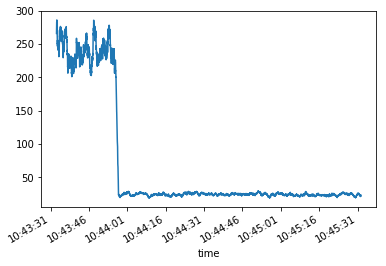

In [5]:
series = data.value
series.rolling(100, center=True).mean().plot()

In [6]:
w1 = []
w2 = []
w1size = 100
w2size = 500
alarmThreshold = 50
for index, value in enumerate(series):
    w1.append(value)
    w2.append(value)
    if (len(w1) < w1size) or (len(w2) < w2size) :
        continue
    mean_w1 = sum(w1[-w1size:])/float(w1size)
    mean_w2 = sum(w2[-w2size:])/float(w2size)
    
    if abs(mean_w1 - mean_w2) > alarmThreshold:
        print("Change detected at time " + str(series.index[index]))
        break

Change detected at time 2018-04-07 10:43:57.296796
